In [112]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [113]:
def display_images(img1, img2):
  _, ax = plt.subplots(1, 2, figsize=(20, 10))
  ax[0].imshow(img1, cmap='gray')
  ax[1].imshow(img2, cmap='gray')

In [114]:
def display_matched_image(img):
  plt.figure(figsize=(20,40))
  plt.imshow(img)

In [115]:
def detect_orb(img1, img2):
  orb = cv2.ORB_create()

  return (orb.detectAndCompute(img1, None), orb.detectAndCompute(img2, None))

In [116]:
def get_top_sorted_matches(matches, n_top):
  return sorted(matches, key = lambda x : x.distance)[:n_top]

In [117]:
def brute_force_matcher(des1, des2):
  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

  matches = bf.match(des1, des2)
  return get_top_sorted_matches(matches, 20)

In [118]:
def custom_matcher(des1, des2):
  matches = []
  for i, k1 in enumerate(des1):
    for j, k2 in enumerate(des2):
        matches.append(cv2.DMatch(_distance=np.linalg.norm((k1 - k2), ord=1), _imgIdx=0, _queryIdx=i,_trainIdx=j))
            
  return get_top_sorted_matches(matches, 20)

In [119]:
def display_matches(img1, kp1, img2, kp2, matches1, matches2):
  matched_img1 = cv2.drawMatches(img1, kp1, img2, kp2, matches1, None, 
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  
  matched_img2 = cv2.drawMatches(img1, kp1, img2, kp2, matches2, None, 
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
  
  display_matched_image(matched_img1)
  display_matched_image(matched_img2)

In [120]:
def feature_matching(path1, path2):
  img1 = cv2.imread(f'./img/{path1}')
  img2 = cv2.imread(f'./img/{path2}')

  img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

  display_images(img1_gray, img2_gray)

  orb = cv2.ORB_create()
  (kp1, des1), (kp2, des2) = detect_orb(img1_gray, img2_gray)

  best_bf_matches = brute_force_matcher(des1, des2)
  best_custom_matches = custom_matcher(des1, des2)

  display_matches(img1_gray, kp1, img2_gray, kp2, best_bf_matches, best_custom_matches)

In [121]:
IMAGES = [('opera1.jpeg', 'opera2.jpeg'), ('kyiv1.png', 'kyiv2.png')]

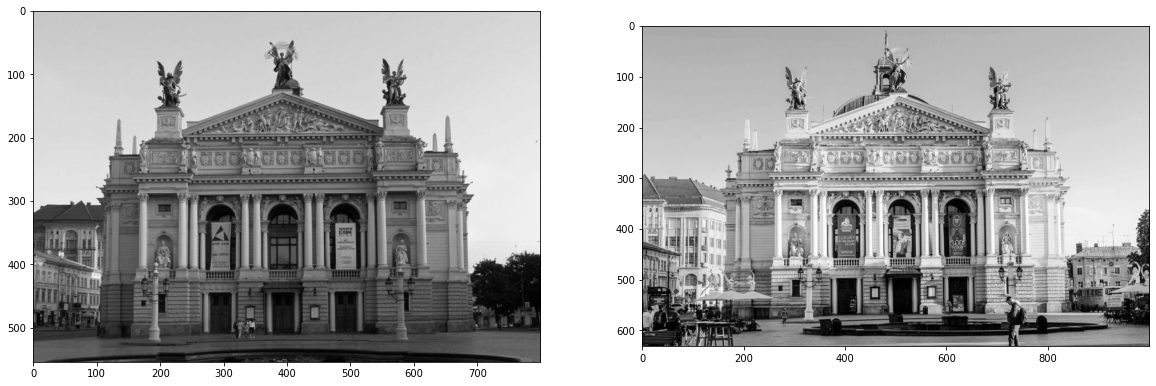

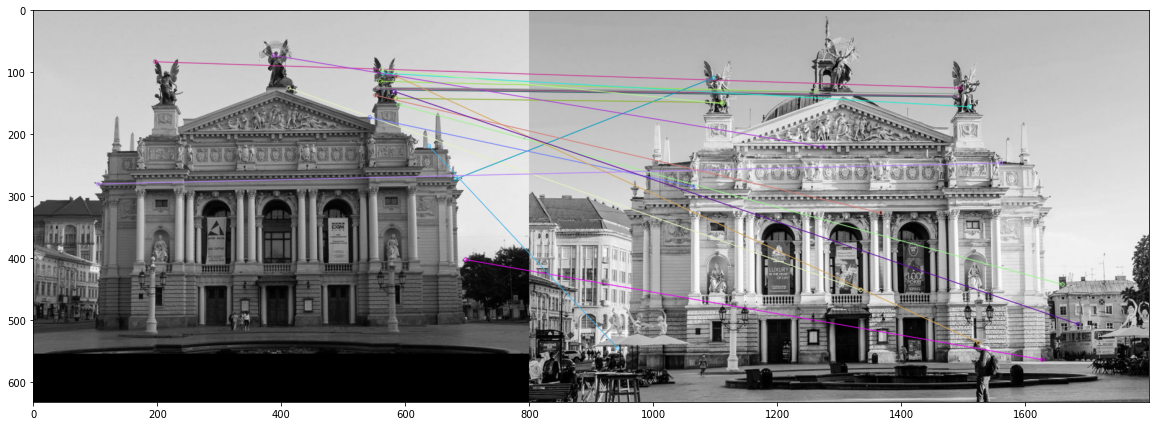

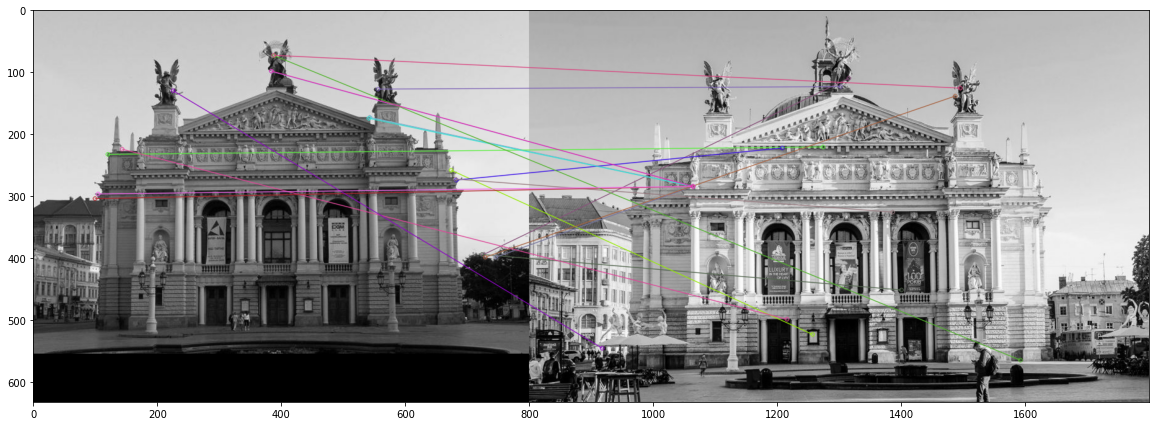

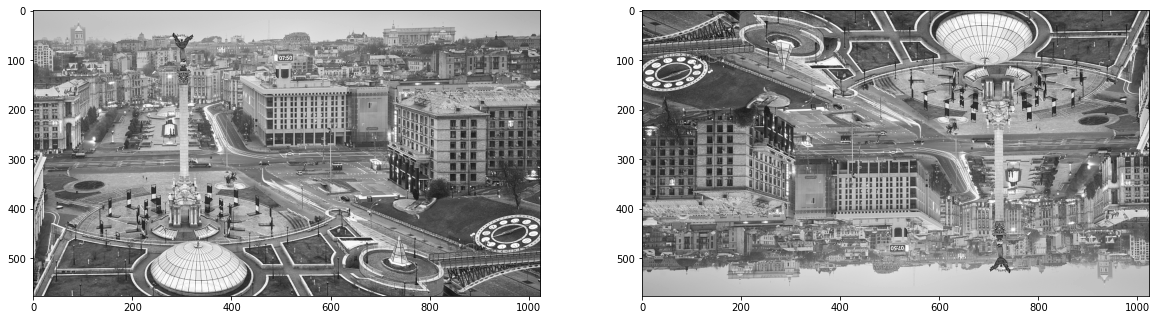

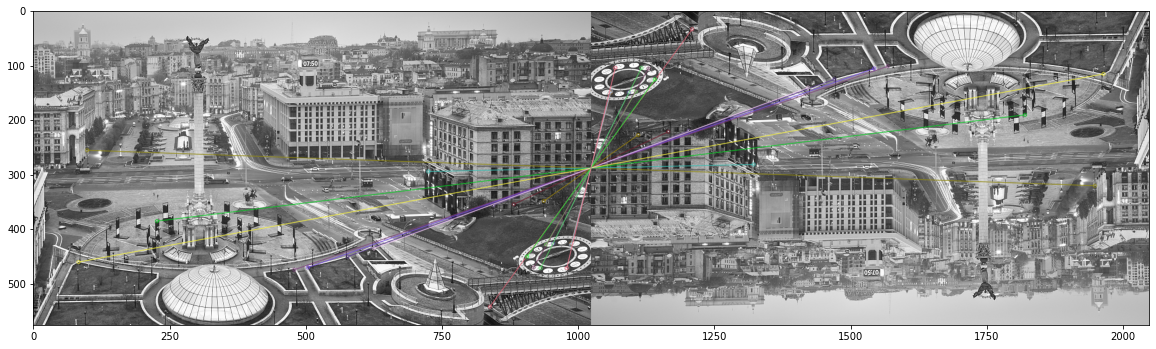

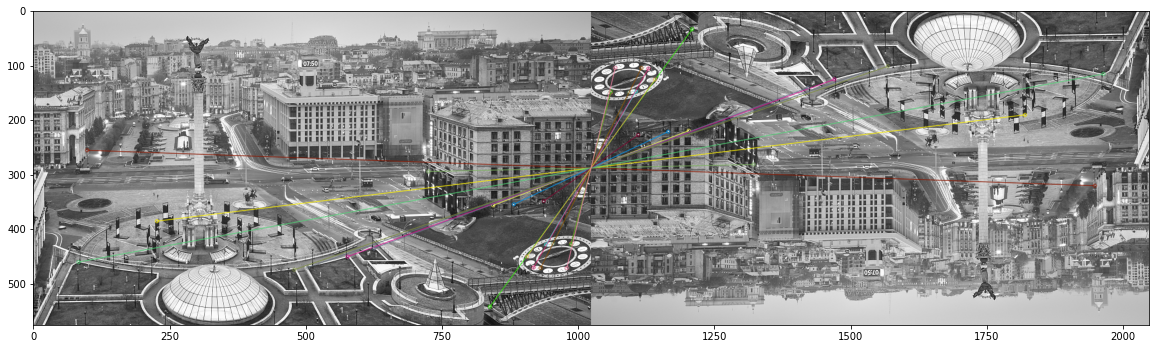

In [122]:
for i in IMAGES:
  feature_matching(i[0], i[1])